# Phase 1

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, StratifiedKFold

## Exploration

In [30]:
df = pd.read_csv('X.csv', sep = ' ', header = None, dtype = float)

In [31]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.106354,0.099752,0.111919,0.106903,0.104012,0.084710,0.098854,0.096039,0.093781,0.089920,...,0.030853,0.027660,0.039405,0.051416,0.048085,0.053249,0.051611,0.049834,0.054026,0.046280
1,0.000000,0.000000,0.000000,0.000000,0.006354,0.368572,0.364862,0.363887,0.390827,0.535976,...,0.098998,0.085979,0.115688,0.321058,0.236679,0.396907,0.009323,0.004108,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.017631,0.011308,0.011253,0.012550,0.216859,0.201320,0.170999,0.372577,0.332591,0.437365,...,0.157373,0.149812,0.149898,0.143233,0.131897,0.133841,0.134041,0.135289,0.152673,0.150228
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.122659,0.139969,0.139665,0.107634,0.040539,0.050871,0.063530,0.116940,0.039709,0.020021


In [17]:
y = pd.read_csv("y_bush_vs_others.csv", header=None)
y_bush = y.values.ravel()
y = pd.read_csv("y_williams_vs_others.csv", header=None)
y_williams = y.values.ravel()

In [32]:
df.shape

(13233, 4096)

In [19]:
np.sum(y_bush)

530

In [20]:
np.sum(y_williams)

52

In [21]:
y_bush.shape

(13233,)

## George Bush

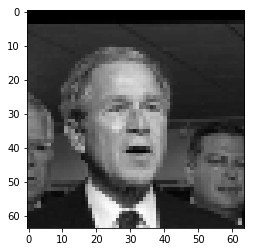

In [33]:
data = np.matrix(df.iloc[1101])
# 2d array where the inside is one big array
#print(data.shape)
#print(data)
data = np.reshape(data, (64,64))
#print(data.shape)
#print(data)
# 2d array where the insides are now 64x64
plt.imshow(data, cmap='gray')
plt.show()

## Serena Williams

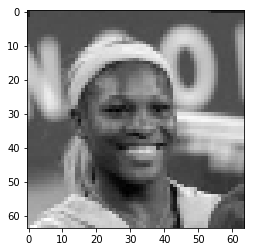

In [34]:
data = np.matrix(df.iloc[9990])
# 2d array where the inside is one big array
#print(data.shape)
#print(data)
data = np.reshape(data, (64,64))
#print(data.shape)
#print(data)
# 2d array where the insides are now 64x64
plt.imshow(data, cmap='gray')
plt.show()

In [28]:
student_id = "A20379665"

In [29]:
r = student_id[-4:]
r

'9665'

## Models

In [36]:
# default
knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
cv_results = cross_validate(knn, 
                            X, 
                            y_bush, 
                            cv=2, 
                            scoring=("precision","recall", "f1"),
                            return_train_score=False,
                            n_jobs = -1)

In [40]:
cv_results

{'fit_time': array([4.15225101, 5.29200006]),
 'score_time': array([833.95163703, 833.15328693]),
 'test_precision': array([0.5 , 0.16]),
 'test_recall': array([0.01132075, 0.01509434]),
 'test_f1': array([0.02214022, 0.02758621])}

In [41]:
cv_results = cross_validate(knn, 
                            X, 
                            y_bush, 
                            cv=3, 
                            scoring=("precision","recall", "f1"),
                            return_train_score=False,
                            n_jobs = -1)

In [42]:
cv_results

{'fit_time': array([ 7.54527617, 12.93597627, 14.38393021]),
 'score_time': array([1271.77988076, 1270.77992392, 1268.4949429 ]),
 'test_precision': array([0.8       , 0.5       , 0.35294118]),
 'test_recall': array([0.02259887, 0.02824859, 0.03409091]),
 'test_f1': array([0.04395604, 0.05347594, 0.06217617])}

In [44]:
stratified_cv_results = cross_validate(knn, 
                                          X, 
                                          y_bush, 
                                          cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=int(r)), 
                                          scoring=("precision","recall", "f1"),
                                          return_train_score=False,
                                          n_jobs = -1)

In [45]:
stratified_cv_results

{'fit_time': array([ 6.98100805,  9.16273093, 14.20674396]),
 'score_time': array([1165.27322984, 1165.98889589, 1161.37804914]),
 'test_precision': array([0.4       , 0.33333333, 0.1       ]),
 'test_recall': array([0.01129944, 0.02824859, 0.00568182]),
 'test_f1': array([0.02197802, 0.05208333, 0.01075269])}

In [ ]:
svc = SVC()

In [ ]:
stratified_cv_results = crocross_validate(svc, 
                                          X, 
                                          y_bush, 
                                          cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=int(r)), 
                                          scoring=("precision","recall", "f1"),
                                          return_train_score=False)

In [ ]:
stratified_cv_results

# break

In [ ]:
p=svc.predict(x_t)

In [ ]:
metrics.f1_score(y_bush, p)

In [ ]:
for e in [-6, -5, -4, -3, -2, -1, 0]:
    g = math.pow(10, e)
    print("gamma", g)
    svc = SVC(C=1000000, gamma=g)
    svc.fit(x_t, y_bush)
    p=svc.predict(x_t)
    print("F1", metrics.f1_score(y_bush, p))

In [ ]:
for e in [-6, -5, -4, -3, -2, -1, 0]:
    g = math.pow(10, e)
    print("gamma", g)
    svc = SVC(C=10, gamma=g)
    svc.fit(x_t, y_bush)
    p=svc.predict(x_t)
    print("F1", metrics.f1_score(y_bush, p))

In [ ]:
svc = SVC(C=10, gamma=0.1)

In [ ]:
stratified_cv_results = crocross_validate(svc, 
                                          x_t, 
                                          y_bush, 
                                          cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=int(r)), 
                                          scoring=("precision","recall", "f1"),
                                          return_train_score=False)

In [ ]:
stratified_cv_results

## Sessions

In [23]:
import sys
!{sys.executable} -m pip install -upgrade pip


Usage:   
  /Users/bolortuyatumurbaatar/anaconda3/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Users/bolortuyatumurbaatar/anaconda3/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Users/bolortuyatumurbaatar/anaconda3/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Users/bolortuyatumurbaatar/anaconda3/bin/python -m pip install [options] [-e] <local project path> ...
  /Users/bolortuyatumurbaatar/anaconda3/bin/python -m pip install [options] <archive url/path> ...

no such option: -u


In [6]:
import dill

In [46]:
dill.dump_session('project.pkl')

In [12]:
# and to load the session again:
dill.load_session('project.pkl')